<table width="100%" style="border: none; border-collapse: collapse;">
  <tr>
    <td align="center" width="55%" style="border: none;">
      <h2>Centro de Investigación en Matemáticas, A.C.</h2>
    </td>
  </tr>
</table>


<h3 align="center">Evaluación de Precisión del Modelo Random Forest en Imágenes de Prueba</h3>

<h4 align="center">Autor: Sarahi Ventura Angoa</h4>

<p align="center">Maestría en Cómputo Estadístico - CIMAT Mty</p>
<p align="center"> Septiembre 2025</p>


<div class="alert alert-block alert-info" role="alert" style="margin-top:8px">
  <h4 style="margin-top:0">Evaluación del desempeño por imagen</h4>
  <p style="margin:0 0 10px 0;">
    Este <code>notebook</code> realiza la evaluación del modelo seleccionado (<strong>Random Forest</strong>) a partir de un conjunto de 20 imágenes completamente etiquetadas de forma manual. 
    Para cada imagen se calculan las siguientes salidas:
  </p>
  <ul style="margin-top:0;">
    <li>Matriz de confusión por imagen (10 clases)</li>
    <li>Precisión por clase (solo clases presentes en ambas fuentes)</li>
    <li>Conteo total de errores de predicción</li>
    <li>Reporte detallado de confusiones (Caso 3)</li>
  </ul>
</div>



#
<div class="alert alert-block alert-success">
<b>Importacion de las librerias</b></div>

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#
<div class="alert alert-block alert-success">
<b>Diccionario de las categorías </b></div>

In [ ]:
# Diccionario de las categorías 
categorias = {
    0: "Árbol",
    1: "Suelo desnudo",
    2: "Pavimento",
    3: "Cuerpo de agua",
    4: "Techo de lámina",
    5: "Techo de losa",
    6: "Arbusto",
    7: "Hierba y pasto seco",
    8: "Hierba y pasto verde",
    9: "Sombra",
    10: "Sin etiqueta"
}

Ruta donde estan los archivos *.csv*
* Caract_ 
* Etiquetado_ 

In [ ]:

# Ruta a la carpeta donde están los archivos .csv
ruta_carpeta = "C:/Users/DELL/Documents/tesis/tesis_visual_code/precision_modelo"

# Lista de archivos etiquetados por el modelo
archivos_caract = [f for f in os.listdir(ruta_carpeta) if f.startswith("Caract_paralelo") and f.endswith(".csv")]


<div class="alert alert-block alert-info" role="alert" style="margin-top:8px">
  <p style="margin:0 0 10px 0;">
    Se consideran únicamente los <strong>Casos 1, 2 y 3</strong> y se <strong>ignoran</strong> las categorías ausentes en ambas fuentes (Caso 4).
  </p>

  <ul style="margin-top:0;">
    <li><strong>Caso 1 (Coincidencias, TP):</strong> la clase aparece tanto en las etiquetas reales como en las predicciones (verdaderos positivos a nivel de superpíxel).</li>
    <li><strong>Caso 2 (Clases omitidas, FN):</strong> la clase está presente en las etiquetas reales pero no aparece en las predicciones.</li>
    <li><strong>Caso 3 (Clases inventadas, FP):</strong> la clase aparece en las predicciones pero no está en las etiquetas reales.</li>
    <li><strong>Caso 4 (Ausentes en ambas):</strong> la clase no aparece en ninguna de las dos fuentes; se <em>omite</em> del análisis.</li>
  </ul>

  <h4 style="margin:10px 0 6px 0;">Métricas</h4>
  <p style="margin:0 0 8px 0;">
    La <strong>precisión por clase</strong> se calcula exclusivamente para aquellas categorías presentes tanto en las etiquetas reales como en las predicciones:
  </p>
</div>

$$
\text{Precisión}_k \;=\; \frac{TP_k}{TP_k + FP_k}
$$


<div class="alert alert-block alert-info" role="alert" style="margin-top:8px">
  <p style="margin:0 0 10px 0;">
    reportando <code>NaN</code> cuando la clase k no cumple dicho criterio. Además, se construye la <strong>matriz de confusión</strong> de dimensión \(10\times 10\) para cada imagen, de acuerdo con el conjunto de clases del modelo.
  </p>

  <h4 style="margin:10px 0 6px 0;">Reporte de errores (Caso 3)</h4>
  <p style="margin:0;">
    Se genera un informe detallado por imagen con las <strong>clases predichas erróneamente</strong> (no presentes en las etiquetas reales), indicando para cada una de ellas las <em>clases verdaderas</em> con las que se confundieron y el <em>número de ocurrencias</em>. Las <strong>clases ausentes en ambas fuentes</strong> (Caso 4) no se incluyen por carecer de valor informativo en la evaluación del desempeño.
  </p>
</div>



* Reporte de clases predichas erróneamente en 'image_x5_1272':
--------------------------------------------------------
'Hierba y pasto seco' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 1 veces
   - Techo de losa: 3 veces
   Total de errores para esta clase: 4

'Sombra' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 5 veces
   - Pavimento: 5 veces
   - Hierba y pasto verde: 3 veces
   Total de errores para esta clase: 13

Clase ausentes en ambos archivos:
 - Cuerpo de agua


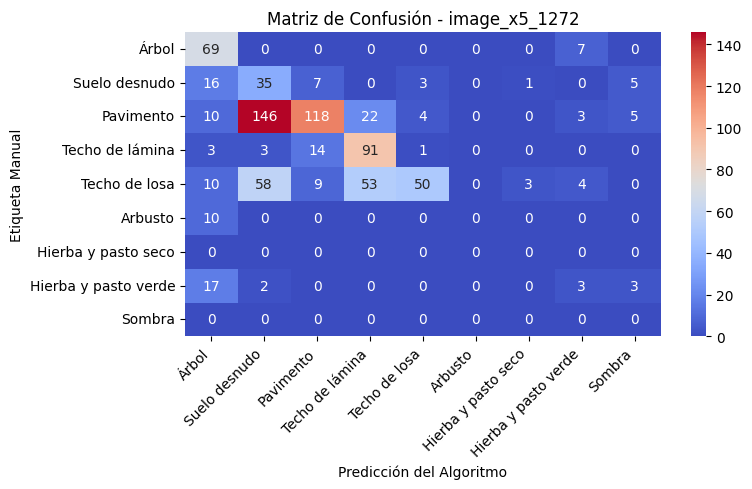


* Reporte de clases predichas erróneamente en 'image_x5_144':
--------------------------------------------------------
'Árbol' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Arbusto: 185 veces
   - Hierba y pasto seco: 16 veces
   - Hierba y pasto verde: 76 veces
   Total de errores para esta clase: 277

'Pavimento' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 1 veces
   Total de errores para esta clase: 1

Clase ausentes en ambos archivos:
 - Cuerpo de agua
 - Techo de lámina
 - Techo de losa
 - Sombra


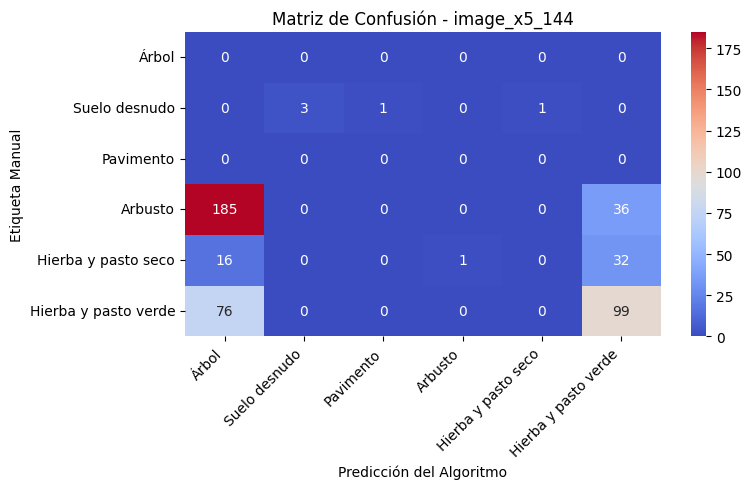


* Reporte de clases predichas erróneamente en 'image_x5_163':
--------------------------------------------------------
'Pavimento' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 9 veces
   - Techo de losa: 15 veces
   Total de errores para esta clase: 24

'Cuerpo de agua' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Techo de losa: 1 veces
   Total de errores para esta clase: 1

'Hierba y pasto seco' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 1 veces
   - Techo de losa: 1 veces
   Total de errores para esta clase: 2

'Sombra' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Árbol: 1 veces
   - Suelo desnudo: 3 veces
   - Techo de losa: 16 veces
   - Hierba y pasto verde: 13 veces
   Total de errores para esta clase: 33



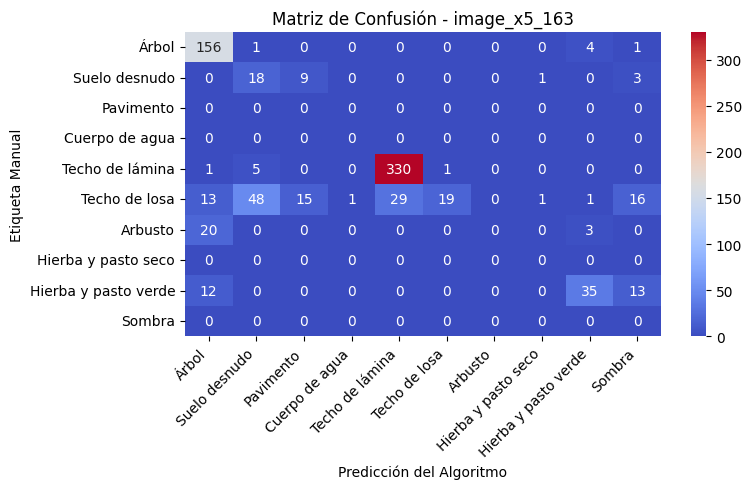


* Reporte de clases predichas erróneamente en 'image_x5_164':
--------------------------------------------------------
'Hierba y pasto seco' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 2 veces
   - Pavimento: 1 veces
   Total de errores para esta clase: 3

Clase ausentes en ambos archivos:
 - Cuerpo de agua


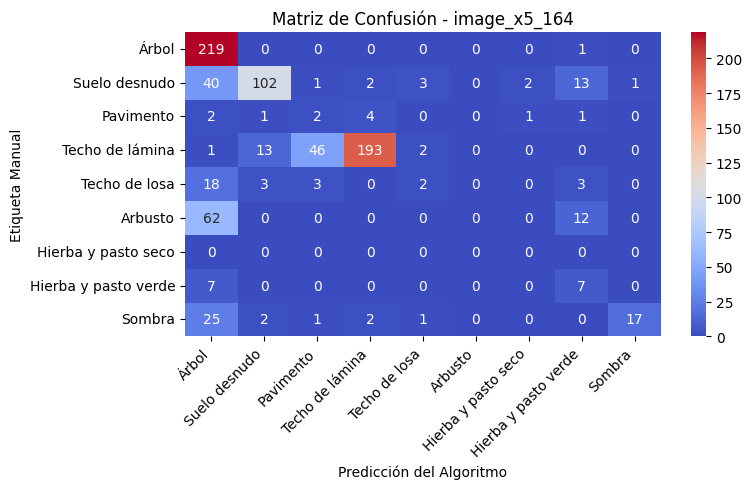


* Reporte de clases predichas erróneamente en 'image_x5_172':
--------------------------------------------------------
'Sombra' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 2 veces
   Total de errores para esta clase: 2

Clase ausentes en ambos archivos:
 - Cuerpo de agua
 - Hierba y pasto seco


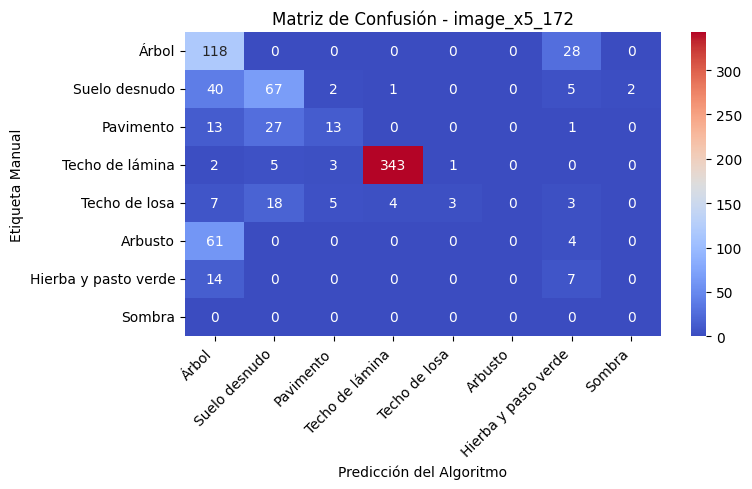


* Reporte de clases predichas erróneamente en 'image_x5_174':
--------------------------------------------------------
'Pavimento' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Techo de lámina: 2 veces
   Total de errores para esta clase: 2

'Techo de losa' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Techo de lámina: 2 veces
   Total de errores para esta clase: 2

'Sombra' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 8 veces
   Total de errores para esta clase: 8

Clase ausentes en ambos archivos:
 - Cuerpo de agua
 - Hierba y pasto seco


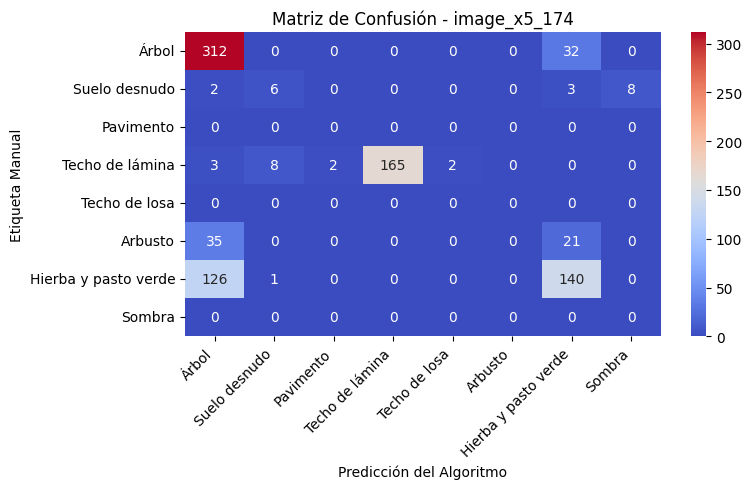


* Reporte de clases predichas erróneamente en 'image_x5_176':
--------------------------------------------------------
'Hierba y pasto seco' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Pavimento: 3 veces
   - Techo de losa: 1 veces
   Total de errores para esta clase: 4

Clase ausentes en ambos archivos:
 - Cuerpo de agua


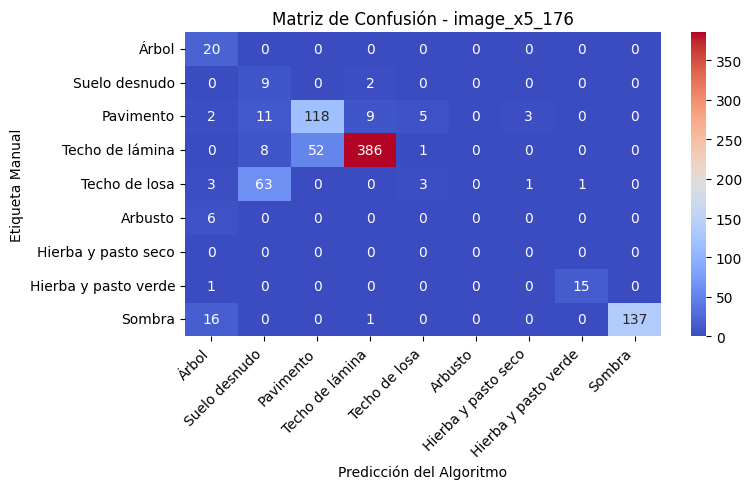


* Reporte de clases predichas erróneamente en 'image_x5_1797':
--------------------------------------------------------
'Cuerpo de agua' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Sombra: 1 veces
   Total de errores para esta clase: 1

'Hierba y pasto seco' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Pavimento: 1 veces
   Total de errores para esta clase: 1



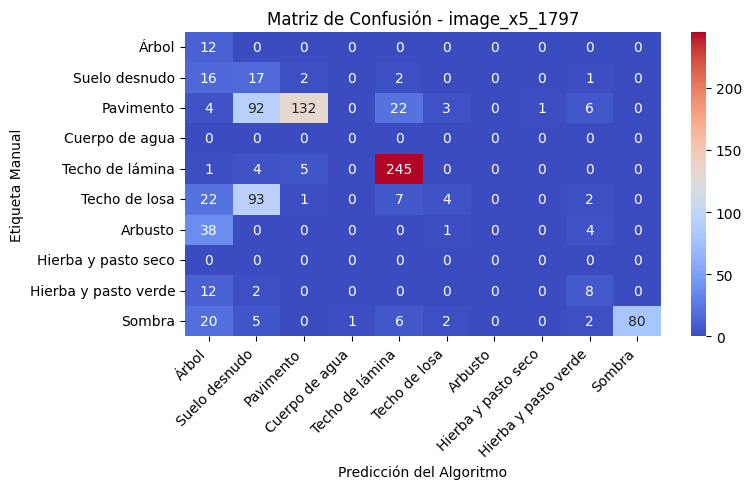


* Reporte de clases predichas erróneamente en 'image_x5_181':
--------------------------------------------------------
'Pavimento' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 18 veces
   Total de errores para esta clase: 18

'Techo de lámina' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Sombra: 1 veces
   Total de errores para esta clase: 1

'Techo de losa' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 6 veces
   Total de errores para esta clase: 6

Clase ausentes en ambos archivos:
 - Cuerpo de agua
 - Arbusto


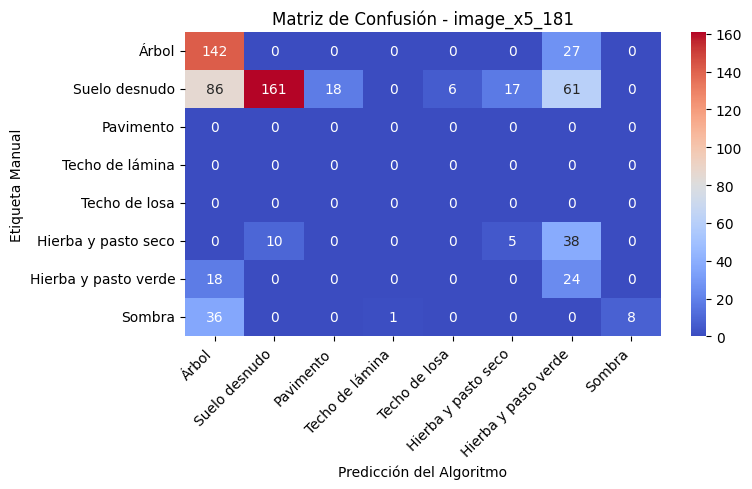


* Reporte de clases predichas erróneamente en 'image_x5_201':
--------------------------------------------------------
'Árbol' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 20 veces
   - Techo de lámina: 2 veces
   - Arbusto: 33 veces
   - Hierba y pasto verde: 10 veces
   - Sombra: 1 veces
   Total de errores para esta clase: 66

'Pavimento' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 64 veces
   - Sombra: 4 veces
   Total de errores para esta clase: 68

'Hierba y pasto seco' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 9 veces
   - Techo de lámina: 1 veces
   Total de errores para esta clase: 10

Clase ausentes en ambos archivos:
 - Cuerpo de agua


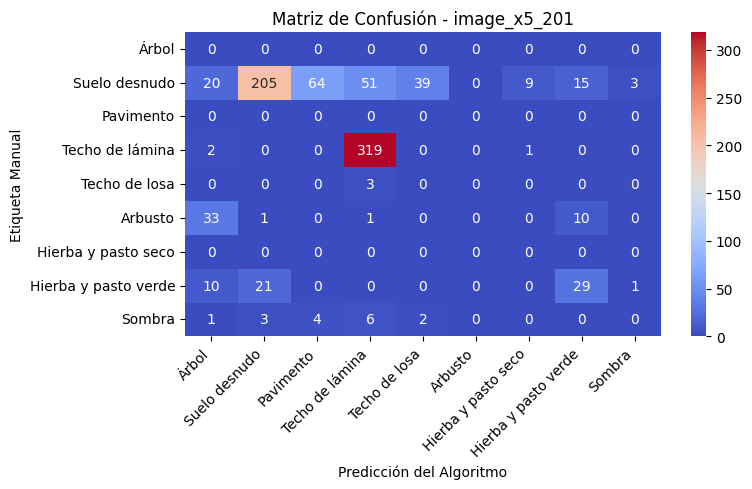


* Reporte de clases predichas erróneamente en 'image_x5_221':
--------------------------------------------------------
'Hierba y pasto seco' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 8 veces
   - Pavimento: 5 veces
   - Techo de losa: 1 veces
   Total de errores para esta clase: 14

Clase ausentes en ambos archivos:
 - Cuerpo de agua


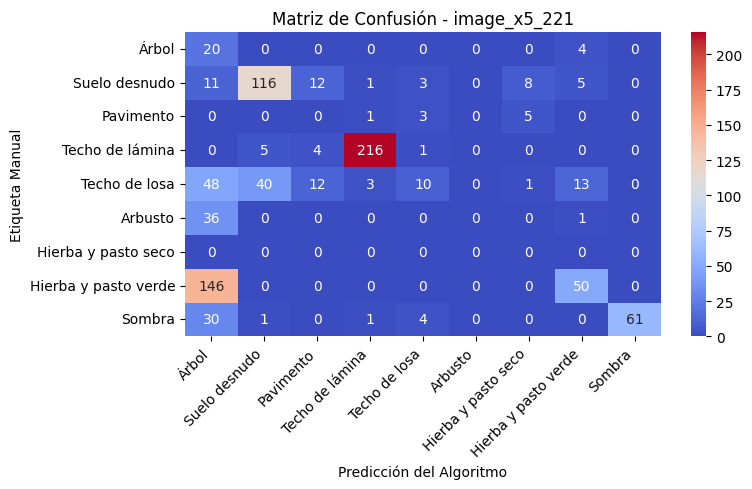


* Reporte de clases predichas erróneamente en 'image_x5_2448':
--------------------------------------------------------
'Pavimento' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 37 veces
   - Hierba y pasto seco: 1 veces
   Total de errores para esta clase: 38

'Techo de lámina' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 3 veces
   Total de errores para esta clase: 3

'Techo de losa' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 8 veces
   Total de errores para esta clase: 8

Clase ausentes en ambos archivos:
 - Cuerpo de agua


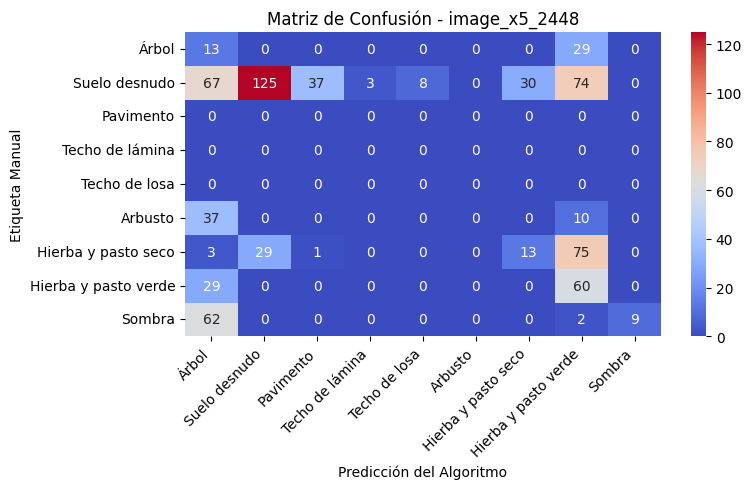


* Reporte de clases predichas erróneamente en 'image_x5_2471':
--------------------------------------------------------
'Cuerpo de agua' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Techo de lámina: 13 veces
   Total de errores para esta clase: 13

'Hierba y pasto seco' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Árbol: 3 veces
   - Techo de losa: 1 veces
   Total de errores para esta clase: 4

'Sombra' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 1 veces
   - Techo de lámina: 1 veces
   - Hierba y pasto verde: 8 veces
   Total de errores para esta clase: 10



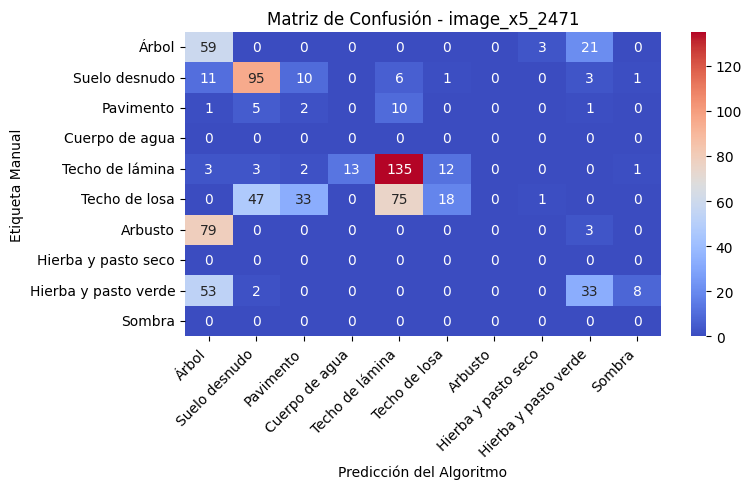


* Reporte de clases predichas erróneamente en 'image_x5_2486':
--------------------------------------------------------
'Hierba y pasto seco' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Pavimento: 1 veces
   - Techo de losa: 1 veces
   Total de errores para esta clase: 2

Clase ausentes en ambos archivos:
 - Cuerpo de agua


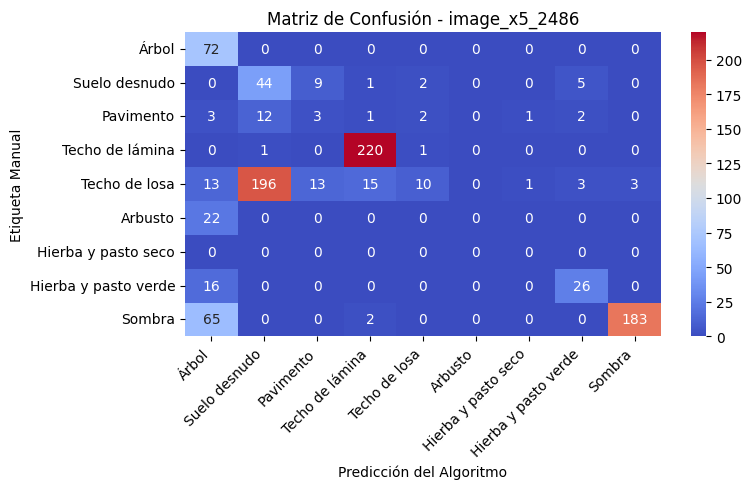


* Reporte de clases predichas erróneamente en 'image_x5_250':
--------------------------------------------------------
'Techo de losa' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 11 veces
   - Pavimento: 7 veces
   Total de errores para esta clase: 18

'Hierba y pasto seco' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 8 veces
   - Pavimento: 24 veces
   - Techo de lámina: 1 veces
   - Sombra: 1 veces
   Total de errores para esta clase: 34

Clase ausentes en ambos archivos:
 - Cuerpo de agua


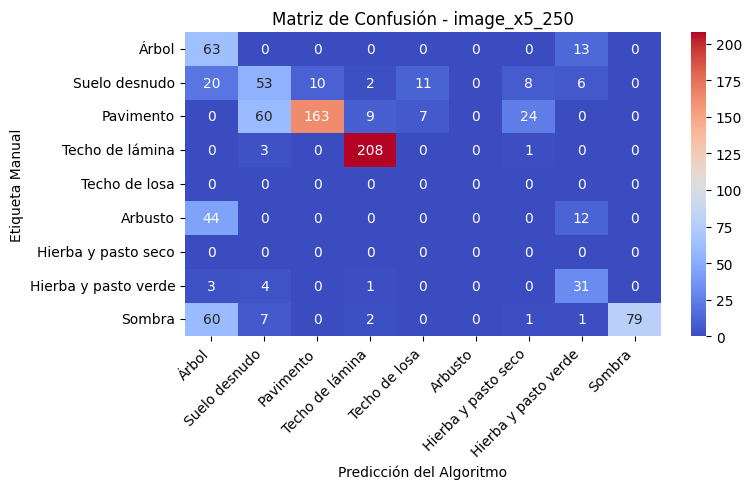


* Reporte de clases predichas erróneamente en 'image_x5_2868':
--------------------------------------------------------
'Techo de losa' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Pavimento: 12 veces
   Total de errores para esta clase: 12

'Hierba y pasto seco' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Pavimento: 11 veces
   Total de errores para esta clase: 11

Clase ausentes en ambos archivos:
 - Cuerpo de agua


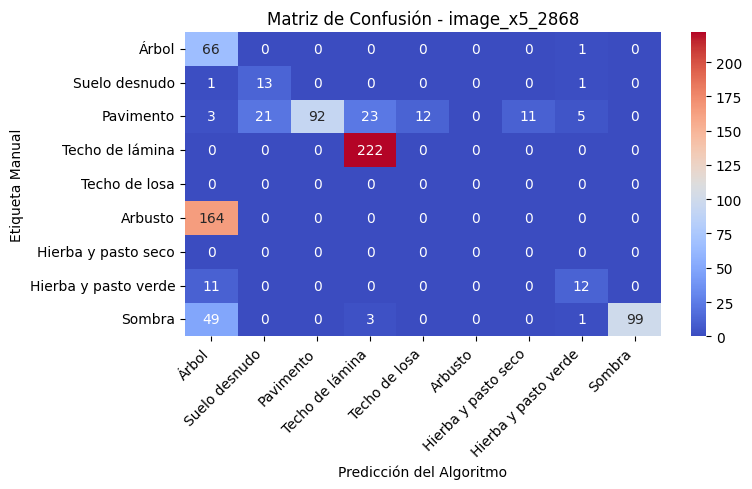


* Reporte de clases predichas erróneamente en 'image_x5_2983':
--------------------------------------------------------
'Hierba y pasto seco' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 2 veces
   - Pavimento: 1 veces
   Total de errores para esta clase: 3

Clase ausentes en ambos archivos:
 - Cuerpo de agua


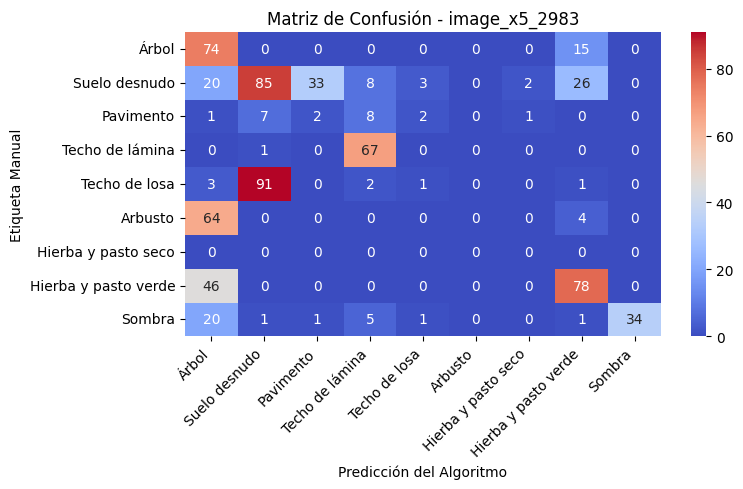


* Reporte de clases predichas erróneamente en 'image_x5_627':
--------------------------------------------------------
'Hierba y pasto seco' fue predicha pero nunca estuvo en etiquetas reales.
   Se confundió con:
   - Suelo desnudo: 1 veces
   Total de errores para esta clase: 1

Clase ausentes en ambos archivos:
 - Pavimento
 - Cuerpo de agua
 - Techo de losa


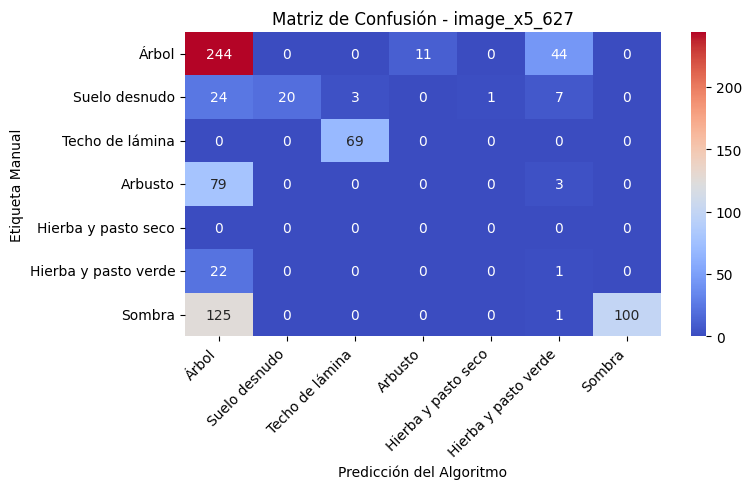

In [ ]:
# Listas para almacenar resultados de precisión y errores por imagen
resultados_precision = []               # Guarda la precisión general y por categoría
resumen_errores_imagen = []            # Guarda los errores totales y clases ausentes por imagen

# Procesar cada imagen (archivo Caract_*)
for archivo_caract in archivos_caract:
    nombre_imagen = archivo_caract.replace("Caract_", "").replace(".csv", "")
    archivo_etiquetado = f"Etiquetado_{nombre_imagen}.csv"

    # Verificar si existe el archivo de etiquetado manual
    if not os.path.exists(os.path.join(ruta_carpeta, archivo_etiquetado)):
        print(f" No se encontró el archivo etiquetado para {nombre_imagen}. Saltando...")
        continue


    # Cargar las predicciones del modelo y el etiquetado manual
    df_caract = pd.read_csv(os.path.join(ruta_carpeta, archivo_caract), usecols=["indice", "prediction"])
    df_etiquetado = pd.read_csv(os.path.join(ruta_carpeta, archivo_etiquetado), usecols=["indice", "categoria"])

    # Asegurar que las columnas 'indice' sean enteros para que coincidan al unir
    df_caract["indice"] = df_caract["indice"].astype(int)
    df_etiquetado["indice"] = df_etiquetado["indice"].astype(int)

    # Unir ambos DataFrames por el índice de superpíxel
    df_comparacion = df_etiquetado.merge(df_caract, on="indice", how="left")
    df_comparacion.rename(columns={"categoria": "Etiqueta_Manual", "prediction": "Prediccion_Algoritmo"}, inplace=True)
    # Eliminar los superpíxeles que fueron etiquetados como "Sin etiqueta" (clase 10)
    df_comparacion = df_comparacion[df_comparacion["Etiqueta_Manual"] != 10]
    
    
    # ==========================
    # Definir clases presentes
    # ==========================


    # Solo considerar clases del 0 al 9 (excluyendo 10) para evaluación
    clases_etiquetadas = set(df_comparacion["Etiqueta_Manual"].unique()) - {10}        # Clases en etiquetas reales
    clases_predichas = set(df_comparacion["Prediccion_Algoritmo"].unique()) - {10}     # Clases en predicciones
    clases_en_ambos = sorted(clases_etiquetadas.union(clases_predichas))             # Clases que aparecen en al menos uno de los .csv



    # Identificar clases ausentes en ambos archivos
    clases_no_aparecen = []   
    clases_a_graficar = []

    for c in categorias.keys():
        if c ==10:  # Ignorar la clase "Sin etiqueta"
            continue
        esta_en_etiquetas = c in clases_etiquetadas
        esta_en_predicciones = c in clases_predichas
        if not esta_en_etiquetas and not esta_en_predicciones:
            clases_no_aparecen.append(categorias[c])    # Guardar para el reporte
        else:
            clases_a_graficar.append(c)                 # Incluir en la matriz de confusión

    # ==========================
    # Calcular matriz de confusión
    # ==========================

    cm = confusion_matrix(
        df_comparacion["Etiqueta_Manual"],
        df_comparacion["Prediccion_Algoritmo"],
        labels=clases_a_graficar
    )

    etiquetas_mapeadas = [categorias[c] for c in clases_a_graficar]

    # ==========================
    # Calcular precisión general
    # ==========================

    # Filtrar solo los superpíxeles con clases presentes en ambos
    df_validos = df_comparacion[df_comparacion["Etiqueta_Manual"].isin(clases_a_graficar)]

    num_aciertos = (df_validos["Etiqueta_Manual"] == df_validos["Prediccion_Algoritmo"]).sum()
    total_superpixeles = len(df_validos)
    precision_general = (num_aciertos / total_superpixeles) * 100 if total_superpixeles > 0 else 0.0

    # ==========================
    # Calcular precisión por categoría
    # ==========================

    precision_por_categoria = {}
    for clase in clases_a_graficar:
        nombre = categorias[clase]

        etiquetas = df_comparacion["Etiqueta_Manual"] == clase
        predicciones = df_comparacion["Prediccion_Algoritmo"] == clase

        total_etiquetas = etiquetas.sum()
        aciertos = (etiquetas & predicciones).sum()

        if total_etiquetas > 0:
            precision_por_categoria[nombre] = (aciertos / total_etiquetas) * 100
        else:
            precision_por_categoria[nombre] = np.nan  # Si no hubo etiquetas reales, no se evalúa

    # Guardar resultados por imagen
    resultados_precision.append({
        "Imagen": nombre_imagen,
        "Precisión General": precision_general,
        **precision_por_categoria
    })

    # ==========================
    # Reporte de errores   
    # ==========================

    errores_predicciones = []

    print(f"\n* Reporte de clases predichas erróneamente en '{nombre_imagen}':")
    print("--------------------------------------------------------")

    for clase_predicha in categorias.keys():
        nombre_clase = categorias[clase_predicha]

        fue_predicha = (df_comparacion["Prediccion_Algoritmo"] == clase_predicha).any()
        existe_en_verdaderas = (df_comparacion["Etiqueta_Manual"] == clase_predicha).any()

        if fue_predicha and not existe_en_verdaderas:
            errores_df = df_comparacion[df_comparacion["Prediccion_Algoritmo"] == clase_predicha]
            conteo_confusiones = errores_df["Etiqueta_Manual"].value_counts().sort_index()

            print(f"'{nombre_clase}' fue predicha pero nunca estuvo en etiquetas reales.")
            print("   Se confundió con:")
            for clase_real, conteo in conteo_confusiones.items():
                nombre_real = categorias.get(int(clase_real), "Desconocida")
                print(f"   - {nombre_real}: {conteo} veces")
            print(f"   Total de errores para esta clase: {len(errores_df)}\n")

            errores_predicciones.append({
                "Clase_predicha": nombre_clase,
                "ID": clase_predicha,
                "Total_errores": len(errores_df),
                "Confusiones": dict(conteo_confusiones.map(int))
            })


    # Reporte de clases completamente ausentes (caso 4 eliminado)
    if clases_no_aparecen:
        print("Clase ausentes en ambos archivos:")
        for clase_nombre in clases_no_aparecen:
            print(f" - {clase_nombre}")

    # Guardar resumen de errores para esta imagen
    total_errores_imagen = sum(e["Total_errores"] for e in errores_predicciones)
    resumen_errores_imagen.append({
        "Imagen": nombre_imagen,
        "Errores_totales_predichos_erróneamente": total_errores_imagen,
        "Clases_ausentes": clases_no_aparecen
    })

    # ==========================
    # Grafico de la matriz de confusión
    # ==========================

    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",
                xticklabels=etiquetas_mapeadas,
                yticklabels=etiquetas_mapeadas)
    plt.xlabel("Predicción del Algoritmo")
    plt.ylabel("Etiqueta Manual")
    plt.title(f"Matriz de Confusión - {nombre_imagen}")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    
# lista para almacenar los resultados de todas las imagenes
df_precision = pd.DataFrame(resultados_precision)
df_errores = pd.DataFrame(resumen_errores_imagen)


Resultados de la presicion de todas las imagenes, los NaN, puede deberse a que cayo en el caso 3 o 4, osea:
* Caso 3: 
* Caso 4:


#
<div class="alert alert-block alert-success">
<b>Precision general y por categoría, para cada uno de las imagenes de prueba</b></div>

In [ ]:
# Convertir las listas a DataFrames
df_precision  

,Imagen,Precisión General,Árbol,Suelo desnudo,Pavimento,Techo de lámina,Techo de losa,Arbusto,Hierba y pasto seco,Hierba y pasto verde,Sombra,Cuerpo de agua
0,image_x5_1272,46.624204,90.789474,52.238806,38.311688,81.250000,26.737968,0.0,NaN,12.000000,NaN,NaN
1,image_x5_144,22.666667,NaN,60.000000,NaN,NaN,NaN,0.0,0.000000,56.571429,NaN,NaN
2,image_x5_163,73.809524,96.296296,58.064516,NaN,97.922849,13.286713,0.0,NaN,58.333333,NaN,NaN
3,image_x5_164,66.503067,99.545455,62.195122,18.181818,75.686275,6.896552,0.0,NaN,50.000000,35.416667,NaN
4,image_x5_172,69.134253,80.821918,57.264957,24.074074,96.892655,7.500000,0.0,NaN,33.333333,NaN,NaN
5,image_x5_174,71.939954,90.697674,31.578947,NaN,91.666667,NaN,0.0,NaN,52.434457,NaN,NaN
6,image_x5_176,78.808706,100.000000,81.818182,79.729730,86.353468,4.225352,0.0,NaN,93.750000,88.961039,NaN
7,image_x5_1797,56.914286,100.000000,44.736842,50.769231,96.078431,3.100775,0.0,NaN,36.363636,68.965517,NaN
8,image_x5_181,51.671733,84.023669,46.131805,NaN,NaN,NaN,NaN,9.433962,57.142857,17.777778,NaN
9,image_x5_201,64.830012,NaN,50.492611,NaN,99.068323,0.000000,0.0,NaN,47.540984,0.000000,NaN


#
<div class="alert alert-block alert-success">
<b>Dataframe del resumen de errores por clase no presente en etiquetas (caso 3) y clases ausentes en ambos
archivos (caso 4)</b></div>

In [35]:
df_errores

,Imagen,Errores_totales_predichos_erróneamente,Clases_ausentes
0,image_x5_1272,17,[Cuerpo de agua]
1,image_x5_144,278,"[Cuerpo de agua, Techo de lámina, Techo de los..."
2,image_x5_163,60,[]
3,image_x5_164,3,[Cuerpo de agua]
4,image_x5_172,2,"[Cuerpo de agua, Hierba y pasto seco]"
5,image_x5_174,12,"[Cuerpo de agua, Hierba y pasto seco]"
6,image_x5_176,4,[Cuerpo de agua]
7,image_x5_1797,2,[]
8,image_x5_181,25,"[Cuerpo de agua, Arbusto]"
9,image_x5_201,144,[Cuerpo de agua]


Por si se desea guardar estos dos ultimos dataframes y la ruta


In [ ]:
# Ruta de salida donde quieres guardar 
salida_precision = os.path.join(ruta_carpeta, "resultados_precision.csv")
salida_errores = os.path.join(ruta_carpeta, "resumen_errores.csv")

# Guardar como CSV
df_precision.to_csv(salida_precision, index=False, encoding='utf-8-sig')
df_errores.to_csv(salida_errores, index=False, encoding='utf-8-sig')

print(f"\n Resultados guardados correctamente en:")
print(f"  - {salida_precision}")
print(f"  - {salida_errores}")
